<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/NetflixBusinessCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1AXID_Fvkt6dNsJdEPlx-Vlea1UwD15Ht -O 'Netflix.csv'

Downloading...
From: https://drive.google.com/uc?id=1AXID_Fvkt6dNsJdEPlx-Vlea1UwD15Ht
To: /content/Netflix.csv
100% 3.40M/3.40M [00:00<00:00, 233MB/s]


In [ ]:
import numpy as np, pandas as pd, math, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
netflix = pd.read_csv('Netflix.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

#Converted date_added to datetime

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'].str.strip(),format='%B %d, %Y')

In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
netflix.describe(include = 'object' )

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


#Split Director Column on comma, fill missing value with '#' (which will be updated later with best possible director) , melt it, strip individual director names to remove whitespaces

In [ ]:
max(netflix[~netflix['director'].isna()]['director'], key=len)


'Nuhash Humayun, Syed Ahmed Shawki, Rahat Rahman, Robiul Alam Robi, Golam Kibria Farooki, Mir Mukarram Hossain, Tanvir Ahsan, Mahmudul Islam, Abdullah Al Noor, Krishnendu Chattopadhyay, Syed Saleh Ahmed Sobhan'

In [ ]:
netflix['director'] = netflix['director'].str.split(',')
# Fill missing value of director with '#' and will replace this value later with an possible appropriate director
spdirectordf = pd.DataFrame(netflix['director'].fillna('#').tolist()).add_prefix('director_')

len(max(netflix[~netflix['director'].isna()]['director'], key=len))
# Number of columns is as per max number of directors we have for a movie in the dataset.

13

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
spdirectordf.head()

,director_0,director_1,director_2,director_3,director_4,director_5,director_6,director_7,director_8,director_9,director_10,director_11,director_12
0,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
1,#,None,None,None,None,None,None,None,None,None,None,None,None
2,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
3,#,None,None,None,None,None,None,None,None,None,None,None,None
4,#,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
netflixWithspDirector = pd.concat([netflix,spdirectordf],axis =1)
netflixWithspDirector = pd.melt(netflixWithspDirector,id_vars=netflix.columns.tolist())
netflixWithspDirector.drop(['director'],axis=1,inplace=True)
netflixWithspDirector.rename({'value':'director'},axis = 1,inplace=True)
# IMPORTANT : For movies where we have less number of director than max number of directors we have for a movie, None is added
# IMPORTANT : After MELTING (director will be transformed in a single column) we will REMOVE the rows having None as value for director because they were added due to above step and is not needed
netflixWithspDirector = netflixWithspDirector[~netflixWithspDirector['director'].isna()]
netflixWithspDirector = netflixWithspDirector.loc[:,['show_id','type','director']]
netflixWithspDirector.head()

,show_id,type,director
0,s1,Movie,Kirsten Johnson
1,s2,TV Show,#
2,s3,TV Show,Julien Leclercq
3,s4,TV Show,#
4,s5,TV Show,#


In [ ]:
# Strip out Starting and Trailing WhiteSpaces
netflixWithspDirector['director'] = netflixWithspDirector['director'].str.strip()
netflixWithspDirector['director'].unique()
# Column Director with value '#' denotes missing value in director column of original dataset
# Will replace this value later with an possible appropriate director


array(['Kirsten Johnson', '#', 'Julien Leclercq', ..., 'Hiroshi Yamazaki',
       'James Gunn', 'Mark Henn'], dtype=object)

In [ ]:
netflixWithspDirector['show_id'].nunique()

8807

#Split listed_in Column on comma, there are no missing values as per .info() did in upper cells, melt it, strip individual genre names to remove whitespaces

In [ ]:
# Doing Same operation for listed-in

netflix['listed_in'] = netflix['listed_in'].str.split(',')

#IMPORTANT Didnot used fillna because there is no null for listed_in column as infered by .info method in previous cell
spgenredf = pd.DataFrame(netflix['listed_in'].tolist()).add_prefix('genre_')

len(max(netflix[~netflix['listed_in'].isna()]['listed_in'], key=len))
# Number of columns is as per max number of listed_in we have for a movie in the dataset.


3

In [ ]:
spgenredf.head()

,genre_0,genre_1,genre_2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies


In [ ]:
netflixWithspGenre = pd.concat([netflix,spgenredf],axis =1)
netflixWithspGenre = pd.melt(netflixWithspGenre,id_vars=netflix.columns.tolist())
netflixWithspGenre.rename({'value':'genre'},axis = 1,inplace=True)
# IMPORTANT : For movies where we have less number of listed_in than max number of listed_in we have for a movie, None is added
# IMPORTANT : After melting (multiple genre column will be transformed in a single column named genre) we will remove the rows having None as value for listed_in because they were added due to above step and is not needed
netflixWithspGenre = netflixWithspGenre[~netflixWithspGenre['genre'].isna()]
netflixWithspGenre = netflixWithspGenre.loc[:,['show_id','type','genre']]
netflixWithspGenre.head()

,show_id,type,genre
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
2,s3,TV Show,Crime TV Shows
3,s4,TV Show,Docuseries
4,s5,TV Show,International TV Shows


In [ ]:
# Strip out Starting and Trailing WhiteSpaces
netflixWithspGenre['genre'] = netflixWithspGenre['genre'].str.strip()
netflixWithspGenre['genre'].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies',
       'Korean TV Shows', 'Science & Nature TV', 'Faith & Spirituality',
       'Teen TV Shows', 'TV Mysteries', 'TV Thrillers'], dtype=object)

In [ ]:
netflixWithspGenre['show_id'].nunique()

8807

In [ ]:
netflix['country'].value_counts()
#Looks Like country column also contains multiple comma seperated values

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

#Split Country Column on comma, fill missing value with '#' (which will be updated later with best possible coountry) , melt it, strip individual country names to remove whitespaces

In [ ]:
# Doing Same operation for listed-in

netflix['country'] = netflix['country'].str.split(',')

spcountrydf = pd.DataFrame(netflix['country'].fillna('#').tolist()).add_prefix('country_')

len(max(netflix[~netflix['country'].isna()]['country'], key=len))
# Number of columns is as per max number of country we have for a movie in the dataset.


12

In [ ]:
spcountrydf.head()

,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,country_11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,#,None,None,None,None,None,None,None,None,None,None,None
3,#,None,None,None,None,None,None,None,None,None,None,None
4,India,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
netflixWithspCountry = pd.concat([netflix,spcountrydf],axis =1)
netflixWithspCountry = pd.melt(netflixWithspCountry,id_vars=netflix.columns.tolist())
netflixWithspCountry.drop(['country'],axis=1,inplace=True)
netflixWithspCountry.rename({'value':'country'},axis = 1,inplace=True)
# IMPORTANT : For movies where we have less number of country than max number of country we have for a movie, None is added
# IMPORTANT : After melting (multiple country column will be transformed in a single column named country) we will remove
# the rows having None as value for country because they were added due to above step and is not needed
netflixWithspCountry = netflixWithspCountry[~netflixWithspCountry['country'].isna()]
netflixWithspCountry = netflixWithspCountry.loc[:,['show_id','type','country']]
netflixWithspCountry.head()

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,#
3,s4,TV Show,#
4,s5,TV Show,India


In [ ]:
# Strip out Starting and Trailing WhiteSpaces
netflixWithspCountry['country'] = netflixWithspCountry['country'].str.strip()
netflixWithspCountry['country'].unique()
# Column country with value '#' denotes missing value in country column of original dataset
# Will replace this value later with an possible appropriate country if needed

array(['United States', 'South Africa', '#', 'India', 'United Kingdom',
       'Germany', 'Mexico', 'Turkey', 'Australia', 'Finland', 'China',
       'Nigeria', 'Japan', 'Spain', 'France', 'Belgium', 'South Korea',
       'Argentina', 'Russia', 'Canada', 'Hong Kong', 'Italy', '',
       'Ireland', 'New Zealand', 'Jordan', 'Colombia', 'Switzerland',
       'Israel', 'Brazil', 'Taiwan', 'Bulgaria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Kuwait', 'Malaysia', 'Vietnam',
       'Sweden', 'Lebanon', 'Romania', 'Philippines', 'Iceland',
       'Denmark', 'United Arab Emirates', 'Netherlands', 'Norway',
       'Syria', 'Mauritius', 'Austria', 'Czech Republic', 'Cameroon',
       'Uruguay', 'Kenya', 'Chile', 'Luxembourg', 'Bangladesh',
       'Portugal', 'Hungary', 'Senegal', 'Singapore', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Belarus', 'Ghana', 'Zimbabwe',
       'Puerto Rico', 'Pakistan', 'Cyprus', 'Paraguay', 'Croatia',
       'Cambodia', 'Georgia', '

In [ ]:
netflixWithspCountry['show_id'].nunique()

8807

#Split Cast Column on comma, fill missing value with '#' (which will be updated later with best possible cast) , melt it, strip individual cast names to remove whitespaces

In [ ]:
spcastdf = netflix['cast'].fillna('#').str.split(',',expand = True).add_prefix('cast_')

In [ ]:
# Number of columns is as per max number of cast we have for a movie in the dataset.
spcastdf

,cast_0,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,cast_7,cast_8,cast_9,...,cast_40,cast_41,cast_42,cast_43,cast_44,cast_45,cast_46,cast_47,cast_48,cast_49
0,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
2,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
3,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
8803,#,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8804,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8805,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
netflixWithspCast = pd.concat([netflix,spcastdf],axis =1)
netflixWithspCast = pd.melt(netflixWithspCast,id_vars=netflix.columns.tolist())
netflixWithspCast.drop(['cast'],axis=1,inplace=True)
netflixWithspCast.rename({'value':'cast'},axis = 1,inplace=True)
# IMPORTANT : For movies where we have less number of cast than max number of cast we have for a movie, None is added
# IMPORTANT : After melting (multiple cast column will be transformed in a single column named cast) we will remove
# the rows having None as value for cast because they were added due to above step and is not needed
netflixWithspCast = netflixWithspCast[~netflixWithspCast['cast'].isna()]
netflixWithspCast = netflixWithspCast.loc[:,['show_id','type','cast']]
netflixWithspCast.head()

,show_id,type,cast
0,s1,Movie,#
1,s2,TV Show,Ama Qamata
2,s3,TV Show,Sami Bouajila
3,s4,TV Show,#
4,s5,TV Show,Mayur More


In [ ]:
# Strip out Starting and Trailing WhiteSpaces
netflixWithspCast['cast'] = netflixWithspCast['cast'].str.strip()
netflixWithspCast['cast'].value_counts()
# Column cast with value '#' denotes missing value in cast column of original dataset
# Will replace this value later with an possible appropriate cast if needed

#                   825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
                   ... 
Kim Hyun-wook         1
Élodie Bouchez        1
Anthony Quayle        1
Elva Josephson        1
Ayize Ma'at           1
Name: cast, Length: 36440, dtype: int64

In [ ]:
netflixWithspCast['show_id'].nunique()

8807

In [ ]:
netflixWithspDirector, netflixWithspGenre , netflixWithspCountry, netflixWithspCast

(       show_id     type          director
 0           s1    Movie   Kirsten Johnson
 1           s2  TV Show                 #
 2           s3  TV Show   Julien Leclercq
 3           s4  TV Show                 #
 4           s5  TV Show                 #
 ...        ...      ...               ...
 95585    s7516    Movie    Rusty Cundieff
 102764   s5888    Movie      Mike Gabriel
 103787   s6911    Movie  Hiroshi Yamazaki
 104392   s7516    Movie        James Gunn
 111571   s5888    Movie         Mark Henn
 
 [9612 rows x 3 columns],
       show_id     type                   genre
 0          s1    Movie           Documentaries
 1          s2  TV Show  International TV Shows
 2          s3  TV Show          Crime TV Shows
 3          s4  TV Show              Docuseries
 4          s5  TV Show  International TV Shows
 ...       ...      ...                     ...
 26414   s8801  TV Show               TV Dramas
 26415   s8802    Movie               Thrillers
 26416   s8803    Movie 

#Categorized Genres in below categories

1. Comedy  	:    	'Comedies', 'TV Comedies' , Stand-Up Comedy' , 'Stand-Up Comedy & Talk Shows'

2. Romance		:	'Romantic Movies', 'Romantic TV Shows'

3. Horror		:	'Horror Movies' , 'TV Horror'

4. Thrillers	:	'Thrillers' , 'TV Thrillers' , 'TV Mysteries' , 'Crime TV Shows',

5. Sci-Fi		:	'Sci-Fi & Fantasy' , 'Science & Nature TV' , 'TV Sci-Fi & Fantasy'

6. Drama		:	'TV Dramas' ,  'Dramas' , 'TV Shows'

7. Regional	:	'Korean TV Shows' ,  'Spanish-Language TV Shows','British TV Shows'

8. Family & Kids	:	"Kids' TV", 'Anime Series' , 'Children & Family Movies' ,'Anime Features'

9. Documentary	:	'Documentaries' , 'Docuseries'

10. Global		:	'International TV Shows',  'International Movies'

11. Action & Adventure :	'Action & Adventure' , 'TV Action & Adventure' , 'Reality TV' ,'Teen TV Shows'

12. Classic		:	'Classic Movies', 'Classic & Cult TV' ,  'Cult Movies'

13. 'LGBTQ Movies'

14. 'Faith & Spirituality'

15. 'Sports Movies'

16. Other Movies	:	'Movies', 'Independent Movies'

17. 'Music & Musicals'

In [ ]:
netflixWithspGenre['simplified_genre'] = netflixWithspGenre['genre']

netflixWithspGenre.loc[(netflixWithspGenre['genre'] == 'Comedies') | (netflixWithspGenre['genre'] == 'TV Comedies')  | (netflixWithspGenre['genre'] == 'Stand-Up Comedy') |(netflixWithspGenre['genre'] == 'Stand-Up Comedy & Talk Shows'), 'simplified_genre'] = 'Comedy'

netflixWithspGenre.loc[(netflixWithspGenre['genre'] == 'Romantic Movies') | (netflixWithspGenre['genre'] == 'Romantic TV Shows'), 'simplified_genre'] = 'Romance'

netflixWithspGenre.loc[(netflixWithspGenre['genre'] == 'Horror Movies') | (netflixWithspGenre['genre'] == 'TV Horror'), 'simplified_genre'] = 'Horror'

netflixWithspGenre.loc[(netflixWithspGenre['genre'] == 'Thrillers') | (netflixWithspGenre['genre'] == 'TV Thrillers') | ( netflixWithspGenre['genre'] == 'TV Mysteries' ) | (netflixWithspGenre['genre'] == 'Crime TV Shows'), 'simplified_genre'] = 'Thrillers'


netflixWithspGenre.loc[( netflixWithspGenre['genre'] == 'Sci-Fi & Fantasy' ) | ( netflixWithspGenre['genre'] == 'Science & Nature TV' ) | ( netflixWithspGenre['genre'] == 'TV Sci-Fi & Fantasy'), 'simplified_genre'] = 'Sci-Fi'


netflixWithspGenre.loc[ ( netflixWithspGenre['genre'] == 'TV Dramas' ) | ( netflixWithspGenre['genre'] == 'Dramas' ) | ( netflixWithspGenre['genre'] == 'TV Shows'), 'simplified_genre'] = 'Drama'


netflixWithspGenre.loc[( netflixWithspGenre['genre'] == 'Korean TV Shows' ) | ( netflixWithspGenre['genre'] == 'Spanish-Language TV Shows') | ( netflixWithspGenre['genre'] =='British TV Shows'), 'simplified_genre'] = 'Regional'


netflixWithspGenre.loc[( netflixWithspGenre['genre'] =="Kids' TV") | ( netflixWithspGenre['genre'] == 'Anime Series' ) | ( netflixWithspGenre['genre'] == 'Children & Family Movies' ) | ( netflixWithspGenre['genre'] =='Anime Features'), 'simplified_genre'] = 'Family & Kids'


netflixWithspGenre.loc[( netflixWithspGenre['genre'] == 'Documentaries' ) | ( netflixWithspGenre['genre'] == 'Docuseries' ), 'simplified_genre'] = 'Documentary'


netflixWithspGenre.loc[( netflixWithspGenre['genre'] == 'International TV Shows') | ( netflixWithspGenre['genre'] ==  'International Movies'), 'simplified_genre'] = 'Global'


netflixWithspGenre.loc[( netflixWithspGenre['genre'] == 'Action & Adventure' ) | ( netflixWithspGenre['genre'] == 'TV Action & Adventure' ) | ( netflixWithspGenre['genre'] == 'Reality TV' ) | ( netflixWithspGenre['genre'] =='Teen TV Shows'), 'simplified_genre'] = 'Action & Adventure'


netflixWithspGenre.loc[( netflixWithspGenre['genre'] == 'Classic Movies') | ( netflixWithspGenre['genre'] == 'Classic & Cult TV' ) | ( netflixWithspGenre['genre'] ==  'Cult Movies'), 'simplified_genre'] = 'Classic'


netflixWithspGenre.loc[( netflixWithspGenre['genre'] == 'Movies') | ( netflixWithspGenre['genre'] == 'Independent Movies'), 'simplified_genre'] = 'Other Movies'

In [ ]:
netflixWithspGenre['genre'].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies',
       'Korean TV Shows', 'Science & Nature TV', 'Faith & Spirituality',
       'Teen TV Shows', 'TV Mysteries', 'TV Thrillers'], dtype=object)

In [ ]:
netflixWithspGenre['simplified_genre'].unique()

array(['Documentary', 'Global', 'Thrillers', 'Drama', 'Family & Kids',
       'Regional', 'Comedy', 'Horror', 'Action & Adventure', 'Sci-Fi',
       'Classic', 'Other Movies', 'Romance', 'Music & Musicals',
       'LGBTQ Movies', 'Sports Movies', 'Faith & Spirituality'],
      dtype=object)

#Replace default value for Director ('#') which are present due to missing data in original netflix dataset , with director having most movies in that genre and show type

In [ ]:
netflixWithspDirector[netflixWithspDirector['director'] == '#']

,show_id,type,director
1,s2,TV Show,#
3,s4,TV Show,#
4,s5,TV Show,#
10,s11,TV Show,#
14,s15,TV Show,#
...,...,...,...
8795,s8796,TV Show,#
8796,s8797,TV Show,#
8797,s8798,TV Show,#
8800,s8801,TV Show,#


In [ ]:
netflixWithspGenreAndDirector = netflixWithspGenre.merge(netflixWithspDirector, on = 'show_id')
netflixWithspGenreAndDirector['type'] = netflixWithspGenreAndDirector['type_x']
netflixWithspGenreAndDirector.drop(['type_x','type_y'],axis =1 , inplace=True)
netflixWithspGenreAndDirector.head()

,show_id,genre,simplified_genre,director,type
0,s1,Documentaries,Documentary,Kirsten Johnson,Movie
1,s2,International TV Shows,Global,#,TV Show
2,s2,TV Dramas,Drama,#,TV Show
3,s2,TV Mysteries,Thrillers,#,TV Show
4,s3,Crime TV Shows,Thrillers,Julien Leclercq,TV Show


In [ ]:
directorHavingMostMoviesinAGenreAndShowType =  netflixWithspGenreAndDirector[~(netflixWithspGenreAndDirector['director'] == '#')].groupby(['genre','type'])['director'].max().reset_index()
directorHavingMostMoviesinAGenreAndShowType.rename({'director': 'PossibleDirector'}, axis =1, inplace = True)
directorHavingMostMoviesinAGenreAndShowType.head()

,genre,type,PossibleDirector
0,Action & Adventure,Movie,Ömer Faruk Sorak
1,Anime Features,Movie,Zhao Ji
2,Anime Series,TV Show,Yasuhiro Irie
3,British TV Shows,TV Show,Toby Haynes
4,Children & Family Movies,Movie,Éric Warin


In [ ]:
netflixWithspGenreAndDirector = netflixWithspGenreAndDirector.merge(directorHavingMostMoviesinAGenreAndShowType,on = 'genre')
netflixWithspGenreAndDirector['type'] = netflixWithspGenreAndDirector['type_x']
netflixWithspGenreAndDirector.drop(['type_x','type_y'],axis =1 , inplace=True)
netflixWithspGenreAndDirector

,show_id,genre,simplified_genre,director,PossibleDirector,type
0,s1,Documentaries,Documentary,Kirsten Johnson,Álvaro Longoria,Movie
1,s17,Documentaries,Documentary,Pedro de Echave García,Álvaro Longoria,Movie
2,s17,Documentaries,Documentary,Pablo Azorín Williams,Álvaro Longoria,Movie
3,s46,Documentaries,Documentary,Tyler Greco,Álvaro Longoria,Movie
4,s69,Documentaries,Documentary,Hanns-Bruno Kammertöns,Álvaro Longoria,Movie
...,...,...,...,...,...,...
20909,s7722,Classic & Cult TV,Classic,#,Sunny Lau,TV Show
20910,s8190,Classic & Cult TV,Classic,#,Sunny Lau,TV Show
20911,s8542,Classic & Cult TV,Classic,#,Sunny Lau,TV Show
20912,s8600,Classic & Cult TV,Classic,Michael Cumming,Sunny Lau,TV Show


In [ ]:
netflixWithspGenreAndDirector.loc[netflixWithspGenreAndDirector['director'] == '#','director'] = netflixWithspGenreAndDirector.loc[netflixWithspGenreAndDirector['director'] == '#','PossibleDirector']

In [ ]:
netflixWithspGenreAndDirector

,show_id,genre,simplified_genre,director,PossibleDirector,type
0,s1,Documentaries,Documentary,Kirsten Johnson,Álvaro Longoria,Movie
1,s17,Documentaries,Documentary,Pedro de Echave García,Álvaro Longoria,Movie
2,s17,Documentaries,Documentary,Pablo Azorín Williams,Álvaro Longoria,Movie
3,s46,Documentaries,Documentary,Tyler Greco,Álvaro Longoria,Movie
4,s69,Documentaries,Documentary,Hanns-Bruno Kammertöns,Álvaro Longoria,Movie
...,...,...,...,...,...,...
20909,s7722,Classic & Cult TV,Classic,Sunny Lau,Sunny Lau,TV Show
20910,s8190,Classic & Cult TV,Classic,Sunny Lau,Sunny Lau,TV Show
20911,s8542,Classic & Cult TV,Classic,Sunny Lau,Sunny Lau,TV Show
20912,s8600,Classic & Cult TV,Classic,Michael Cumming,Sunny Lau,TV Show


In [ ]:
netflixWithspGenreAndDirector = netflixWithspGenreAndDirector.loc[:,['show_id','type','genre','simplified_genre','director']]
netflixWithspGenreAndDirector
# Director ('#') which are present due to missing data in original netflix dataset , with director having most movies in that genre and show type

,show_id,type,genre,simplified_genre,director
0,s1,Movie,Documentaries,Documentary,Kirsten Johnson
1,s17,Movie,Documentaries,Documentary,Pedro de Echave García
2,s17,Movie,Documentaries,Documentary,Pablo Azorín Williams
3,s46,Movie,Documentaries,Documentary,Tyler Greco
4,s69,Movie,Documentaries,Documentary,Hanns-Bruno Kammertöns
...,...,...,...,...,...
20909,s7722,TV Show,Classic & Cult TV,Classic,Sunny Lau
20910,s8190,TV Show,Classic & Cult TV,Classic,Sunny Lau
20911,s8542,TV Show,Classic & Cult TV,Classic,Sunny Lau
20912,s8600,TV Show,Classic & Cult TV,Classic,Michael Cumming


In [ ]:
netflixWithspGenreAndDirector['director'].value_counts()

Ziad Doueiri           2331
Vijay Roche             541
Vijay S. Bhanushali     434
Takuya Igarashi         410
Vanessa Roth            336
                       ... 
Huang Jianming            1
Tony Leondis              1
Young Jun Lee             1
Roy Allen Smith           1
Eric Abrams               1
Name: director, Length: 4993, dtype: int64

# Replace default value for Cast ('#') which are present due to missing data in original netflix dataset,  with cast having most movies in that genre and show type

In [ ]:
netflixWithspGenreAndCast = netflixWithspGenre.merge(netflixWithspCast)
castHavingMostMoviesinAGenreAndShowType =  netflixWithspGenreAndCast[~(netflixWithspGenreAndCast['cast'] == '#')].groupby(['genre','type'])['cast'].max().reset_index()
castHavingMostMoviesinAGenreAndShowType.rename({'cast': 'PossibleCast'}, axis =1, inplace = True)
netflixWithspGenreAndCast = netflixWithspGenreAndCast.merge(castHavingMostMoviesinAGenreAndShowType)
netflixWithspGenreAndCast.loc[netflixWithspGenreAndCast['cast'] == '#','cast'] = netflixWithspGenreAndCast.loc[netflixWithspGenreAndCast['cast'] == '#','PossibleCast']
netflixWithspGenreAndCast = netflixWithspGenreAndCast.loc[:,['show_id','type','genre','cast','simplified_genre']]
netflixWithspGenreAndCast

,show_id,type,genre,cast,simplified_genre
0,s1,Movie,Documentaries,Ángel Mosqueda,Documentary
1,s17,Movie,Documentaries,Ángel Mosqueda,Documentary
2,s46,Movie,Documentaries,Ángel Mosqueda,Documentary
3,s69,Movie,Documentaries,Michael Schumacher,Documentary
4,s89,Movie,Documentaries,Malcolm X,Documentary
...,...,...,...,...,...
149507,s8645,TV Show,Classic & Cult TV,Russ Tamblyn,Classic
149508,s8645,TV Show,Classic & Cult TV,Don S. Davis,Classic
149509,s8645,TV Show,Classic & Cult TV,Chris Mulkey,Classic
149510,s8645,TV Show,Classic & Cult TV,Gary Hershberger,Classic


In [ ]:
netflixWithspGenreAndCast['cast'].value_counts()

Ángel Mosqueda          427
Şükrü Özyıldız          312
İlayda Akdoğan          208
Anupam Kher             120
Shah Rukh Khan           99
                       ... 
Marianne Williamson       1
Angie Harmon              1
Aaron Michael Drozin      1
Kendall Ryan Sanders      1
Sam Jones                 1
Name: cast, Length: 36439, dtype: int64

#Replace default value for Country ('#') which are present due to missing data in original netflix dataset,  with country where most movies in that genre and show type and produced

In [ ]:
netflixWithspGenreAndCountry = netflixWithspGenre.merge(netflixWithspCountry)
countryHavingMostMoviesinAGenreAndShowType =  netflixWithspGenreAndCountry[~(netflixWithspGenreAndCountry['country'] == '#')].groupby(['genre','type'])['country'].max().reset_index()
countryHavingMostMoviesinAGenreAndShowType.rename({'country': 'PossibleCountry'}, axis =1, inplace = True)
netflixWithspGenreAndCountry = netflixWithspGenreAndCountry.merge(countryHavingMostMoviesinAGenreAndShowType)
netflixWithspGenreAndCountry.loc[netflixWithspGenreAndCountry['country'] == '#','country'] = netflixWithspGenreAndCountry.loc[netflixWithspGenreAndCountry['country'] == '#','PossibleCountry']
netflixWithspGenreAndCountry = netflixWithspGenreAndCountry.loc[:,['show_id','type','genre','country','simplified_genre']]
netflixWithspGenreAndCountry

,show_id,type,genre,country,simplified_genre
0,s1,Movie,Documentaries,United States,Documentary
1,s17,Movie,Documentaries,Zimbabwe,Documentary
2,s46,Movie,Documentaries,Zimbabwe,Documentary
3,s69,Movie,Documentaries,Zimbabwe,Documentary
4,s89,Movie,Documentaries,Zimbabwe,Documentary
...,...,...,...,...,...
23759,s7722,TV Show,Classic & Cult TV,United States,Classic
23760,s8190,TV Show,Classic & Cult TV,United States,Classic
23761,s8542,TV Show,Classic & Cult TV,United States,Classic
23762,s8600,TV Show,Classic & Cult TV,United Kingdom,Classic


#Splitting Duration with space, setting the first part as duration and converting the column to int

In [ ]:
netflix['duration'].str.split(expand=True).add_prefix('duration')['duration1'].unique()


array(['min', 'Seasons', 'Season', nan], dtype=object)

In [ ]:
netflix['duration']= netflix['duration'].str.split(expand=True).add_prefix('duration')['duration0']
#netflix['duration'] = netflix['duration'].astype(str).astype(int)
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


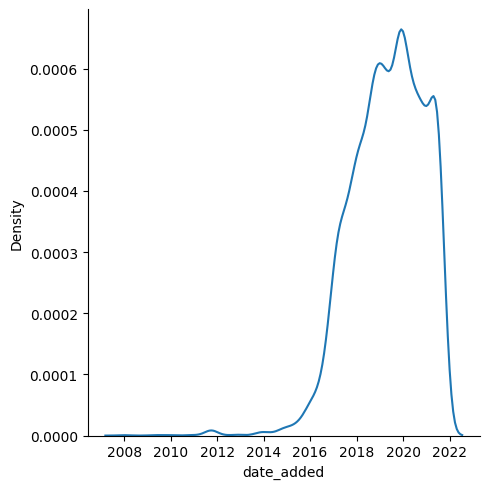

In [ ]:
sns.displot(netflix[(netflix['type'] == 'Movie')]['date_added'],kind='kde')

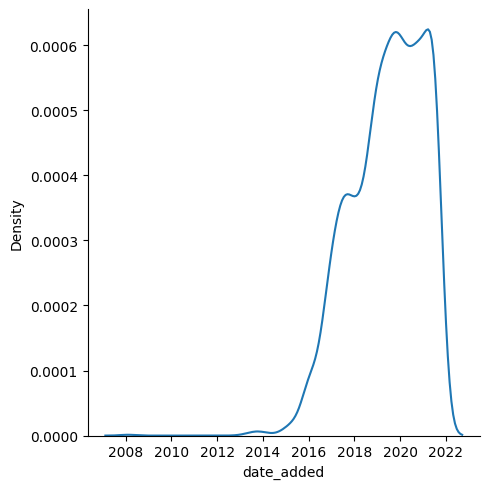

In [ ]:
sns.displot(netflix[(netflix['type'] == 'TV Show')]['date_added'],kind='kde')

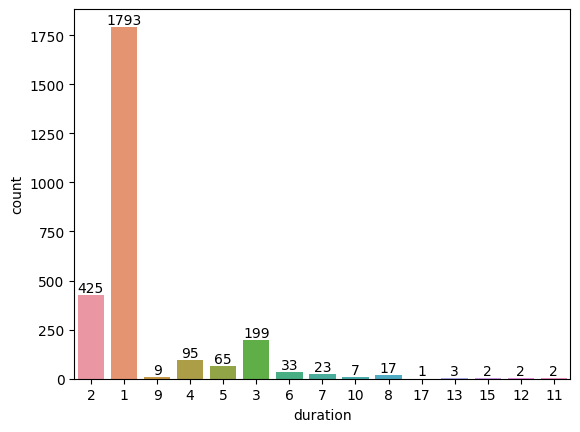

In [ ]:
ax = sns.countplot(data = netflix[(netflix['type'] == 'TV Show')] , x ='duration' )
for i in ax.containers:
    ax.bar_label(i, fontsize = 10)

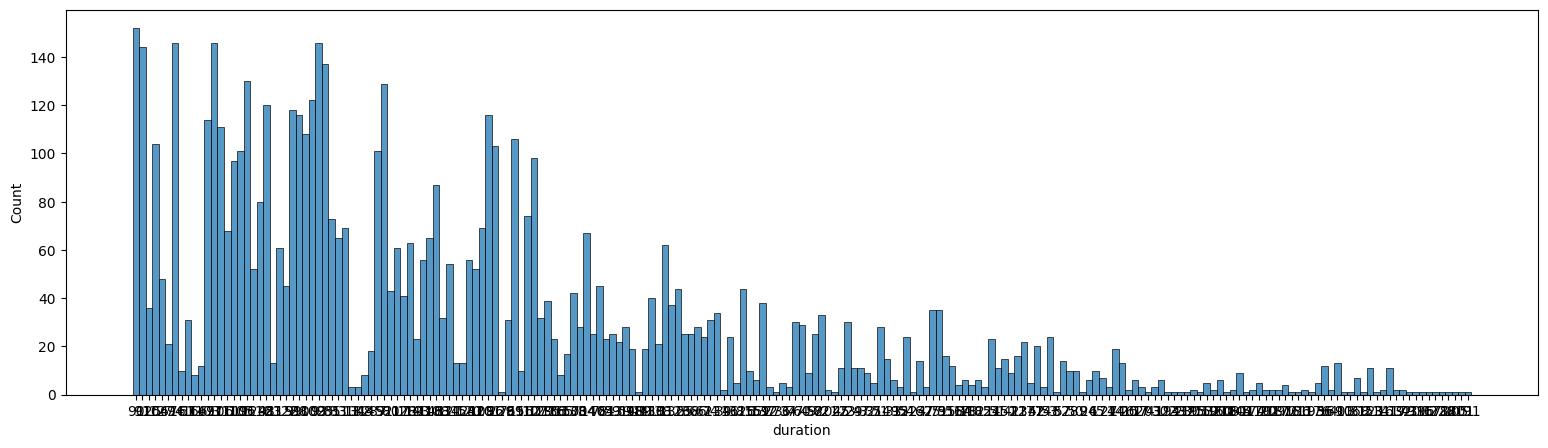

In [ ]:
plt.figure(figsize=(19,5))
ax = sns.histplot(data = netflix[(netflix['type'] == 'Movie')] , x ='duration' )


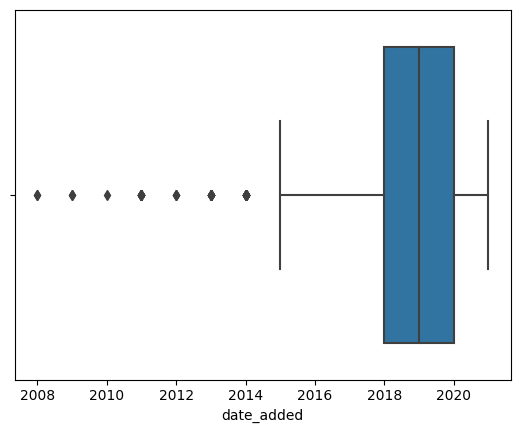

In [ ]:
sns.boxplot(x= netflix["date_added"].dt.year)
plt.show()

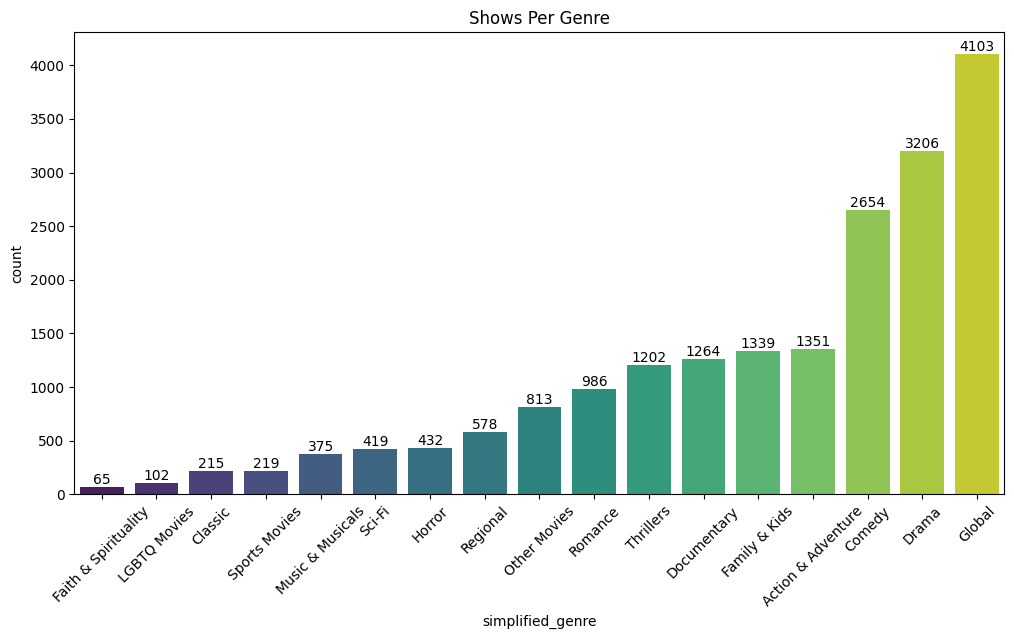

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(data = netflixWithspGenre,
              x = "simplified_genre",
             order = list(netflixWithspGenre["simplified_genre"].value_counts().index)[::-1],
             palette= "viridis")

plt.xticks(rotation = 45, fontsize = 10)


for i in ax.containers:
    ax.bar_label(i, fontsize = 10)


plt.title("Shows Per Genre")

plt.show()

# NOTE : One show can belong to multiple genre since listed_in column
# had comma separated genre category (Which we have categorized for simplicity)

In [ ]:
netflix['date_added_year'] = netflix['date_added'].dt.year
netflix['show_id_number'] = netflix['show_id'].str.split('s',expand=True).add_prefix('show_')['show_1']
netflix['show_id_number'] = netflix['show_id_number'].astype(str).astype(int)

#7. Business Insights


*   netflixWithspGenreAndDirector
*   netflixWithspGenreAndCast
*   netflixWithspGenreAndCountry

are 3 variables which have been created above to drive insights from the dataset after processing comma separated values from Column director,cast,listed_in, country, striping whitespaces, filling missing values with best possible director,cast,genre(renamed listed_in),country as per the genre and show type

In [ ]:
netflixWithspGenreAndDirector.head()

,show_id,type,genre,simplified_genre,director
0,s1,Movie,Documentaries,Documentary,Kirsten Johnson
1,s17,Movie,Documentaries,Documentary,Pedro de Echave García
2,s17,Movie,Documentaries,Documentary,Pablo Azorín Williams
3,s46,Movie,Documentaries,Documentary,Tyler Greco
4,s69,Movie,Documentaries,Documentary,Hanns-Bruno Kammertöns


In [ ]:
netflixWithspGenreAndCast.head()

,show_id,type,genre,cast,simplified_genre
0,s1,Movie,Documentaries,Ángel Mosqueda,Documentary
1,s17,Movie,Documentaries,Ángel Mosqueda,Documentary
2,s46,Movie,Documentaries,Ángel Mosqueda,Documentary
3,s69,Movie,Documentaries,Michael Schumacher,Documentary
4,s89,Movie,Documentaries,Malcolm X,Documentary


In [ ]:
netflixWithspGenreAndCountry.head()

,show_id,type,genre,country,simplified_genre
0,s1,Movie,Documentaries,United States,Documentary
1,s17,Movie,Documentaries,Zimbabwe,Documentary
2,s46,Movie,Documentaries,Zimbabwe,Documentary
3,s69,Movie,Documentaries,Zimbabwe,Documentary
4,s89,Movie,Documentaries,Zimbabwe,Documentary


In [ ]:
# Genre in Which Movies Are Added In Last 10 Years
temp = netflix[['show_id','date_added_year']].merge(netflixWithspGenre,on = 'show_id')
temp = temp.loc[:,['show_id','date_added_year','type','simplified_genre']]
genreinWhichMostMoviesAreAddedInLast10Years  = temp[(temp['type'] == 'Movie') & (temp['date_added_year'].isin(temp['date_added_year'].value_counts().sort_index(ascending=False).reset_index()['index'].head(10)))]
genreinWhichMostMoviesAreAddedInLast10Years = genreinWhichMostMoviesAreAddedInLast10Years.groupby('simplified_genre')['show_id'].count().sort_values(ascending=False).reset_index()
Top5MovieGenresinLast10Years = genreinWhichMostMoviesAreAddedInLast10Years.head(5)['simplified_genre']
Top5MovieGenresinLast10Years

0                Global
1                 Drama
2                Comedy
3           Documentary
4    Action & Adventure
Name: simplified_genre, dtype: object

In [ ]:
# Genre in Which TV Show Are Added In Last 10 Years
temp = netflix[['show_id','date_added_year']].merge(netflixWithspGenre,on = 'show_id')
temp = temp.loc[:,['show_id','date_added_year','type','simplified_genre']]
genreinWhichMostTVShowAreAddedInLast10Years  = temp[(temp['type'] == 'TV Show') & (temp['date_added_year'].isin(temp['date_added_year'].value_counts().sort_index(ascending=False).reset_index()['index'].head(10)))]
genreinWhichMostTVShowAreAddedInLast10Years.groupby('simplified_genre')['show_id'].count().sort_values(ascending=False).reset_index()
# Top 3 TV Show Generes in Last 10 years as per TV Show added count on netflix in last 10 years
Top5TVShowGenresinLast10Years = genreinWhichMostTVShowAreAddedInLast10Years.groupby('simplified_genre')['show_id'].count().sort_values(ascending=False).reset_index().head(5)['simplified_genre']
Top5TVShowGenresinLast10Years

0           Global
1            Drama
2           Comedy
3    Family & Kids
4        Thrillers
Name: simplified_genre, dtype: object

In [ ]:
mergedData = netflixWithspGenreAndDirector[['show_id','simplified_genre','director','type']].merge(netflixWithspGenreAndCast[['show_id','cast']]).merge(netflixWithspGenreAndCountry[['show_id','country']])
mergedData.head()

,show_id,simplified_genre,director,type,cast,country
0,s1,Documentary,Kirsten Johnson,Movie,Ángel Mosqueda,United States
1,s17,Documentary,Pedro de Echave García,Movie,Ángel Mosqueda,Zimbabwe
2,s17,Documentary,Pedro de Echave García,Movie,Ángel Mosqueda,Zimbabwe
3,s17,Documentary,Pedro de Echave García,Movie,Şükrü Özyıldız,Zimbabwe
4,s17,Documentary,Pedro de Echave García,Movie,Şükrü Özyıldız,Zimbabwe


In [ ]:
# 2.1 Who are the directors, cast worked in this genre and in which country were the movies produced

directorCastCountryAsPerTop5GenreinMovies =  mergedData[(mergedData['simplified_genre'].isin(Top5MovieGenresinLast10Years)) & (mergedData['type'] == 'Movie')].groupby(['director','cast','country'])['show_id'].count()

result = directorCastCountryAsPerTop5GenreinMovies.sort_values(ascending = False).reset_index().head(15)
result[['director','cast','country']]

,director,cast,country
0,Yılmaz Erdoğan,Yılmaz Erdoğan,Turkey
1,Thierry Donard,Wille Lindberg,France
2,Toshiya Shinohara,Kappei Yamaguchi,Japan
3,Toshiya Shinohara,Kumiko Watanabe,Japan
4,Toshiya Shinohara,Satsuki Yukino,Japan
5,Omoni Oboli,Omoni Oboli,Nigeria
6,Toshiya Shinohara,Koji Tsujitani,Japan
7,David Dhawan,Anupam Kher,India
8,Toshiya Shinohara,Houko Kuwashima,Japan
9,Cathy Garcia-Molina,Joross Gamboa,Philippines


In [ ]:
# 2.2 Who are the directors, cast worked in this genre and in which country were the TV Show produced

directorCastCountryAsPerTop5GenreinTVShow =  mergedData[(mergedData['simplified_genre'].isin(Top5TVShowGenresinLast10Years)) & (mergedData['type'] == 'TV Show')].groupby(['director','cast','country'])['show_id'].count()

result = directorCastCountryAsPerTop5GenreinTVShow.sort_values(ascending = False).reset_index().head(20)
result[['director','cast','country']]

,director,cast,country
0,Ziad Doueiri,Yuki Kaji,Japan
1,Ziad Doueiri,Takahiro Sakurai,Japan
2,Yasuhiro Irie,Takahiro Sakurai,Japan
3,Ziad Doueiri,Tay Ping Hui,Singapore
4,Ziad Doueiri,Zhang Zhenhuan,Singapore
5,Yasuhiro Irie,Yuki Kaji,Japan
6,Ziad Doueiri,Rui En,Singapore
7,Ziad Doueiri,Yuichi Nakamura,Japan
8,Ziad Doueiri,İlayda Akdoğan,United States
9,Ziad Doueiri,Jun Fukuyama,Japan


In [ ]:
# Most Watched Movie Genres in terms of time
mostWatchedMoviesGeneresinMins = netflix[netflix['type'] == 'Movie'][['show_id','duration']].merge(netflixWithspGenre, on = 'show_id')
mostWatchedMoviesGeneresinMins = mostWatchedMoviesGeneresinMins[['duration','simplified_genre']]
mostWatchedMoviesGeneresinMins = mostWatchedMoviesGeneresinMins.groupby('simplified_genre')['duration'].aggregate('sum')
Top5MostWatchedMovieGenresinLast10Years = mostWatchedMoviesGeneresinMins.sort_values(ascending=False).reset_index().head(5)['simplified_genre']
Top5MostWatchedMovieGenresinLast10Years

0           Sci-Fi
1           Horror
2        Thrillers
3    Family & Kids
4      Documentary
Name: simplified_genre, dtype: object

In [ ]:
# Most Watched TV Show Genres in terms of number of season (Assumption all season have equal number of episodes and each episode is of same duration, HENCE More Season means More watched)
mostWatchedTVShowGeneres  = netflix[netflix['type'] == 'TV Show'][['show_id','duration']].merge(netflixWithspGenre, on = 'show_id')
mostWatchedTVShowGeneres = mostWatchedTVShowGeneres[['duration','simplified_genre']]
mostWatchedTVShowGeneres = mostWatchedTVShowGeneres.groupby('simplified_genre')['duration'].aggregate('sum')
Top5MostWatchedTVShowGenreinLast10Years = mostWatchedTVShowGeneres.sort_values(ascending=False).reset_index().head(5)['simplified_genre']
Top5MostWatchedTVShowGenreinLast10Years

0     Regional
1       Comedy
2        Drama
3       Global
4    Thrillers
Name: simplified_genre, dtype: object

In [ ]:
# 3.1 Who are the directors, cast worked in this most watched genre and in which country were the movies produced

directorCastCountryAsPerTop5MostWatchedMovieGenres =  mergedData[(mergedData['simplified_genre'].isin(Top5MostWatchedMovieGenresinLast10Years)) & (mergedData['type'] == 'Movie')].groupby(['director','cast','country'])['show_id'].count()

result = directorCastCountryAsPerTop5GenreinMovies.sort_values(ascending = False).reset_index().head(15)
result[['director','cast','country']]

,director,cast,country
0,Yılmaz Erdoğan,Yılmaz Erdoğan,Turkey
1,Thierry Donard,Wille Lindberg,France
2,Toshiya Shinohara,Kappei Yamaguchi,Japan
3,Toshiya Shinohara,Kumiko Watanabe,Japan
4,Toshiya Shinohara,Satsuki Yukino,Japan
5,Omoni Oboli,Omoni Oboli,Nigeria
6,Toshiya Shinohara,Koji Tsujitani,Japan
7,David Dhawan,Anupam Kher,India
8,Toshiya Shinohara,Houko Kuwashima,Japan
9,Cathy Garcia-Molina,Joross Gamboa,Philippines


In [ ]:
# 3.2 Who are the directors, cast worked in this most watched genre and in which country were the movies produced

directorCastCountryAsPerTop5MostWatchedTVShowGenres =  mergedData[(mergedData['simplified_genre'].isin(Top5MostWatchedTVShowGenreinLast10Years)) & (mergedData['type'] == 'TV Show')].groupby(['director','cast','country'])['show_id'].count()

result = directorCastCountryAsPerTop5MostWatchedTVShowGenres.sort_values(ascending = False).reset_index().head(15)
result[['director','cast','country']]

,director,cast,country
0,Ziad Doueiri,Yuki Kaji,Japan
1,Ziad Doueiri,Takahiro Sakurai,Japan
2,Ziad Doueiri,Tay Ping Hui,Singapore
3,Ziad Doueiri,Zhang Zhenhuan,Singapore
4,Ziad Doueiri,Rui En,Singapore
5,Ziad Doueiri,Yuichi Nakamura,Japan
6,Ziad Doueiri,İlayda Akdoğan,United States
7,Ziad Doueiri,Jun Fukuyama,Japan
8,Ziad Doueiri,Daisuke Ono,Japan
9,Ziad Doueiri,Junichi Suwabe,Japan


In [ ]:
# Which director has made movies in Top 5 Most Watched Movie Generes in last 10 years
netflixWithspGenreAndDirector[(netflixWithspGenreAndDirector['simplified_genre'].isin(Top5MostWatchedMovieGenresinLast10Years)) & (netflixWithspGenreAndDirector['type'] == 'Movie')]['director'].value_counts().head()

Álvaro Longoria    58
Éric Warin         37
Rajiv Chilaka      22
Suhas Kadav        16
Àlex Pastor         9
Name: director, dtype: int64

In [ ]:
# Which actors worked in Top 5 Most Watched Movie Generes in last 10 years
netflixWithspGenreAndCast[(netflixWithspGenreAndCast['simplified_genre'].isin(Top5MostWatchedMovieGenresinLast10Years)) & (netflixWithspGenreAndCast['type'] == 'Movie')]['cast'].value_counts().head()

Ángel Mosqueda        425
İlknur Külahlıoglu     34
Julie Tejwani          26
Rupa Bhimani           25
Rajesh Kava            21
Name: cast, dtype: int64

In [ ]:
# In Which countries movies are produced for Top 5 Most Watched Movie Generes in last 10 years
netflixWithspGenreAndCountry[(netflixWithspGenreAndCountry['simplified_genre'].isin(Top5MostWatchedMovieGenresinLast10Years)) & (netflixWithspGenreAndCountry['type'] == 'Movie')]['country'].value_counts().head()

United States     1592
United Kingdom     298
Canada             235
India              192
West Germany       155
Name: country, dtype: int64

In [ ]:
# Which director has made TV Shows in Top 5 Most Watched Movie Generes in last 10 years
netflixWithspGenreAndDirector[(netflixWithspGenreAndDirector['simplified_genre'].isin(Top5MostWatchedTVShowGenreinLast10Years)) & (netflixWithspGenreAndDirector['type'] == 'TV Show')]['director'].value_counts()

Ziad Doueiri        2329
Vijay Roche          540
Toby Haynes          230
Picky Talarico       159
Yim Pilsung          144
                    ... 
James Bamford          1
Mick Grogan            1
Rebecca Chaiklin       1
Eric Goode             1
Eric Abrams            1
Name: director, Length: 263, dtype: int64

In [ ]:
# Which cast has acted in Top 5 Most Watched Movie Generes in last 10 years
netflixWithspGenreAndCast[(netflixWithspGenreAndCast['simplified_genre'].isin(Top5MostWatchedTVShowGenreinLast10Years)) & (netflixWithspGenreAndCast['type'] == 'TV Show')]['cast'].value_counts()

Şükrü Özyıldız      121
İsmail Filiz         78
Álvaro Cervantes     51
İştar Gökseven       26
Takahiro Sakurai     25
                   ... 
Danny Trejo           1
Justin Prentice       1
Brandon Flynn         1
Brian Yorkey          1
Sam Jones             1
Name: cast, Length: 13211, dtype: int64

In [ ]:
# In Which country TV Shows are produced for Top 5 Most Watched Movie Generes in last 10 years
netflixWithspGenreAndCountry[(netflixWithspGenreAndCountry['simplified_genre'].isin(Top5MostWatchedTVShowGenreinLast10Years)) & (netflixWithspGenreAndCountry['type'] == 'TV Show')]['country'].value_counts()

United States     1015
United Kingdom     487
West Germany       406
South Korea        373
Japan              211
                  ... 
Malta                2
Belarus              2
Uruguay              1
Hungary              1
Cyprus               1
Name: country, Length: 66, dtype: int64

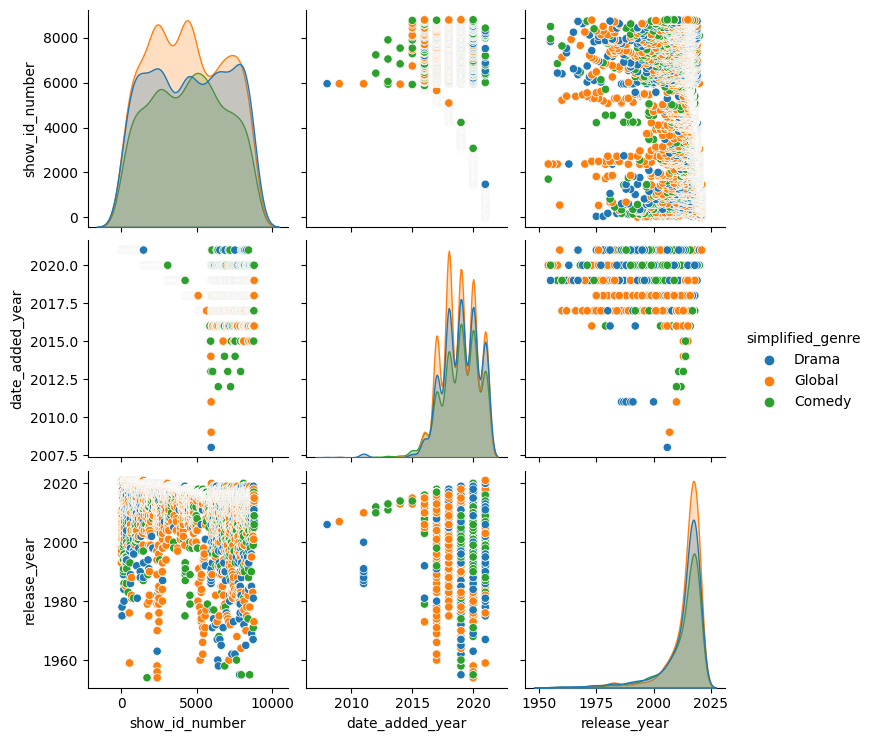

In [ ]:
# Top 3 Most Watched Movie Genre in Last 10 years
Top3MovieGenresinLast10Years = Top5MovieGenresinLast10Years.head(3)
# 'show_id_number' is generated from show_id after removing first char 's'
DSTop3MovieGenresinLast10Years = netflix[['show_id','show_id_number','date_added_year','release_year','duration' ]].merge(netflixWithspGenre,on = 'show_id')
DSTop3MovieGenresinLast10Years = DSTop3MovieGenresinLast10Years[['show_id_number','date_added_year','release_year','duration','simplified_genre', 'type']]
sns.pairplot(DSTop3MovieGenresinLast10Years[(DSTop3MovieGenresinLast10Years['type'] == 'Movie') & (DSTop3MovieGenresinLast10Years['simplified_genre'].isin(Top3MovieGenresinLast10Years))], hue= 'simplified_genre' )

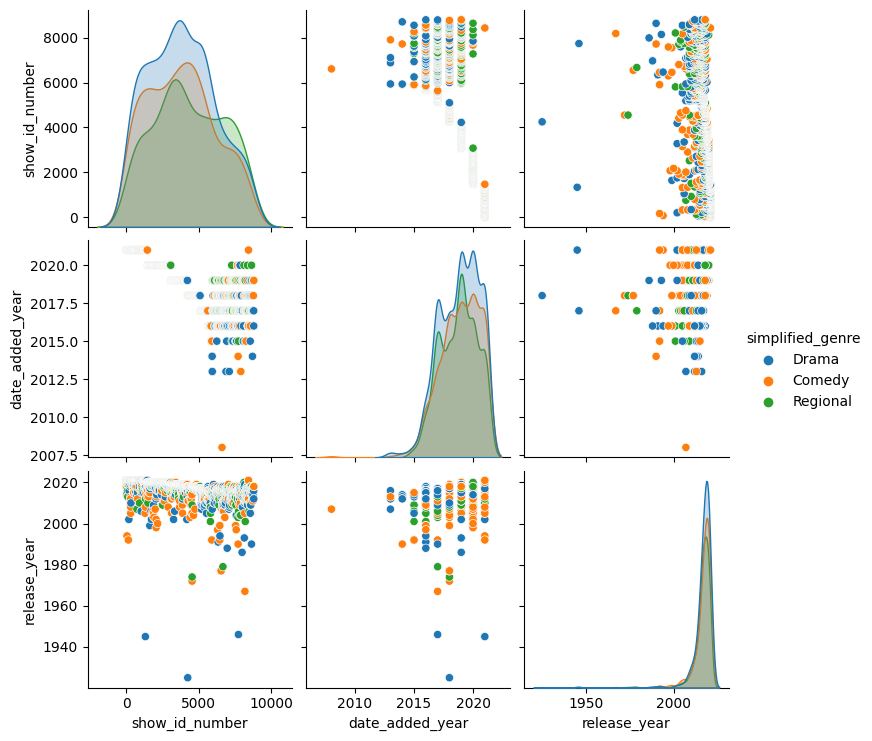

In [ ]:
# Top 3 Most Watched TV Show Genre in Last 10 years
Top3MostWatchedTVShowGenreinLast10Years = Top5MostWatchedTVShowGenreinLast10Years.head(3)
# 'show_id_number' is generated from show_id after removing first char 's'
DSTop3TVShowGenresinLast10Years = netflix[['show_id','show_id_number','date_added_year','release_year','duration' ]].merge(netflixWithspGenre,on = 'show_id')
DSTop3TVShowGenresinLast10Years = DSTop3TVShowGenresinLast10Years[['show_id_number','date_added_year','release_year','duration','simplified_genre', 'type']]
sns.pairplot(DSTop3TVShowGenresinLast10Years[(DSTop3TVShowGenresinLast10Years['type'] == 'TV Show') & (DSTop3TVShowGenresinLast10Years['simplified_genre'].isin(Top3MostWatchedTVShowGenreinLast10Years))], hue= 'simplified_genre' )